In [1]:
import pandas as pd

In [3]:
weather_df = pd.read_json(r'C:\Users\svsta\big_contest\datas\out_data\final_weather.json')

In [11]:
popul_df = pd.read_csv(r'C:\Users\svsta\big_contest\datas\out_data\pub.csv', header=None)

In [16]:
popul_df.columns = ['0', 'Name', 'Gwon','1','total','2','3','4','5']

In [18]:
popul_df = popul_df[['Name', 'total']]

In [19]:
popul_df.dropna(inplace=True)

In [41]:
tokens = list(map(lambda i: set(i), weather_df['loc'].unique()))

In [50]:
temp = {}
for j in popul_df['Name']:
    tl = []
    for t in tokens:
        count = 0
        for i in t:
            if i in j:
                count+=1
        if count > 1:
            tl.append(t)
    temp[j] = tl

In [58]:
temp['서울특별시'][0]

['서', '울']

In [59]:
temp['서울특별시'] = temp['서울특별시'][0]

In [65]:
temp[i]

{'서', '울'}

In [69]:
temp[i] = set(temp[i][s])

TypeError: 'set' object is not subscriptable

In [75]:
temp[i]

{'서', '울'}

In [107]:
temp

{'서울특별시': {'서', '울'},
 '부산광역시': [{'부', '산'}, {'산', '시', '양'}, {'광', '시', '양'}],
 '인천광역시': [{'인', '천'}, {'광', '시', '양'}],
 '대구광역시': [{'구', '대'}, {'광', '시', '양'}],
 '대전광역시': [{'대', '전'}, {'광', '시', '양'}],
 '광주광역시': [{'광', '주'}, {'광', '시', '양'}, {'경', '시', '주'}],
 '경기도\xa0수원시': [{'수', '원'}, {'경', '시', '주'}],
 '울산광역시': [{'산', '울'}, {'산', '시', '양'}, {'광', '시', '양'}],
 '경기도\xa0고양시': [{'산', '시', '양'}, {'광', '시', '양'}, {'경', '시', '주'}],
 '경기도\xa0용인시': [{'경', '시', '주'}],
 '경상남도\xa0창원시': [{'원', '창'}, {'남', '원'}, {'북', '원', '창'}, {'경', '시', '주'}],
 '경기도\xa0성남시': [{'경', '시', '주'}],
 '충청북도\xa0청주시': [{'주', '충'}, {'주', '청'}, {'경', '시', '주'}],
 '경기도\xa0부천시': [{'경', '시', '주'}],
 '경기도\xa0화성시': [{'경', '시', '주'}],
 '경기도\xa0남양주시': [{'산', '시', '양'}, {'광', '시', '양'}, {'경', '시', '주'}],
 '전라북도\xa0전주시': [{'전', '주'}, {'경', '시', '주'}],
 '충청남도\xa0천안시': [{'안', '천'}],
 '경기도\xa0안산시': [{'도', '산', '흑'}, {'산', '시', '양'}, {'경', '시', '주'}],
 '경기도\xa0안양시': [{'산', '시', '양'}, {'광', '시', '양'}, {'경', '시', '주'}],
 '경상남도\xa0김해시'

In [109]:
result = []
for i in temp:
    print(i, temp[i])
    if temp[i] == []:
        result.append(None)
        continue
    s = int(input('선택하세요'))
    print(s)
    if s == -1:
        result.append(None)
        continue
    elif s == 10:
        result.append(temp[i])
    else:
        result.append(temp[i][s])

서울특별시 {'서', '울'}
10
부산광역시 [{'산', '부'}, {'시', '산', '양'}, {'시', '광', '양'}]
0
인천광역시 [{'천', '인'}, {'시', '광', '양'}]
0
대구광역시 [{'대', '구'}, {'시', '광', '양'}]
0
대전광역시 [{'전', '대'}, {'시', '광', '양'}]
0
광주광역시 [{'광', '주'}, {'시', '광', '양'}, {'시', '경', '주'}]
0
경기도 수원시 [{'수', '원'}, {'시', '경', '주'}]
0
울산광역시 [{'산', '울'}, {'시', '산', '양'}, {'시', '광', '양'}]
0
경기도 고양시 [{'시', '산', '양'}, {'시', '광', '양'}, {'시', '경', '주'}]
-1
경기도 용인시 [{'시', '경', '주'}]
-1
경상남도 창원시 [{'창', '원'}, {'원', '남'}, {'창', '북', '원'}, {'시', '경', '주'}]
0
경기도 성남시 [{'시', '경', '주'}]
-1
충청북도 청주시 [{'주', '충'}, {'주', '청'}, {'시', '경', '주'}]
1
경기도 부천시 [{'시', '경', '주'}]
-1
경기도 화성시 [{'시', '경', '주'}]
-1
경기도 남양주시 [{'시', '산', '양'}, {'시', '광', '양'}, {'시', '경', '주'}]
-1
전라북도 전주시 [{'전', '주'}, {'시', '경', '주'}]
0
충청남도 천안시 [{'안', '천'}]
0
경기도 안산시 [{'흑', '산', '도'}, {'시', '산', '양'}, {'시', '경', '주'}]
-1
경기도 안양시 [{'시', '산', '양'}, {'시', '광', '양'}, {'시', '경', '주'}]
-1
경상남도 김해시 [{'시', '김', '해'}, {'해', '남'}, {'시', '경', '주'}, {'해', '남'}]
0
경기도 평택시 [{'시', '경', '주'}]
-1
경상북도 

In [114]:
result = list(map(lambda i: ''.join(list(i)) if i != None else None, result))

In [115]:
result

['서울',
 '산부',
 '천인',
 '대구',
 '전대',
 '광주',
 '수원',
 '산울',
 None,
 None,
 '창원',
 None,
 '주청',
 None,
 None,
 None,
 '전주',
 '안천',
 None,
 None,
 '시김해',
 None,
 '항포',
 '주제',
 None,
 '주파',
 None,
 None,
 '미구',
 None,
 '시산양',
 '주원',
 '주진',
 None,
 None,
 None,
 None,
 '춘천',
 None,
 None,
 '산군',
 None,
 '수여',
 '순천',
 '시경주',
 '거제',
 '포목',
 None,
 '이천',
 '강릉',
 None,
 '주충',
 None,
 None,
 '서산',
 '귀서포',
 None,
 '안동',
 None,
 None,
 '시광양',
 None,
 '천제',
 '영통',
 None,
 None,
 None,
 None,
 None,
 '양평',
 '읍정',
 '영주',
 None,
 None,
 '밀양',
 '홍성',
 '보령',
 None,
 '주상',
 '영천',
 '두동천',
 '동해',
 None,
 None,
 '원남',
 None,
 None,
 '속초',
 '문경',
 None,
 None,
 '홍천',
 '해남',
 '여부',
 None,
 None,
 '흥고',
 None,
 '창거',
 None,
 None,
 '금산',
 '창고',
 None,
 None,
 None,
 '안부',
 '의성',
 None,
 '영광군',
 None,
 '울진',
 '도완',
 None,
 '철원',
 '태백',
 None,
 '함양군',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None

In [150]:
temp.keys()

dict_keys(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시', '경기도\xa0수원시', '울산광역시', '경기도\xa0고양시', '경기도\xa0용인시', '경상남도\xa0창원시', '경기도\xa0성남시', '충청북도\xa0청주시', '경기도\xa0부천시', '경기도\xa0화성시', '경기도\xa0남양주시', '전라북도\xa0전주시', '충청남도\xa0천안시', '경기도\xa0안산시', '경기도\xa0안양시', '경상남도\xa0김해시', '경기도\xa0평택시', '경상북도\xa0포항시', '제주특별자치도\xa0제주시', '경기도\xa0시흥시', '경기도\xa0파주시', '경기도\xa0의정부시', '경기도\xa0김포시', '경상북도\xa0구미시', '경기도\xa0광주시', '경상남도\xa0양산시', '강원도\xa0원주시', '경상남도\xa0진주시', '세종특별자치시', '경기도\xa0광명시', '충청남도\xa0아산시', '전라북도\xa0익산시', '강원도\xa0춘천시', '경상북도\xa0경산시', '경기도\xa0군포시', '전라북도\xa0군산시', '경기도\xa0하남시', '전라남도\xa0여수시', '전라남도\xa0순천시', '경상북도\xa0경주시', '경상남도\xa0거제시', '전라남도\xa0목포시', '경기도\xa0오산시', '경기도\xa0이천시', '강원도\xa0강릉시', '경기도\xa0양주시', '충청북도\xa0충주시', '경기도\xa0안성시', '경기도\xa0구리시', '충청남도\xa0서산시', '제주특별자치도\xa0서귀포시', '충청남도\xa0당진시', '경상북도\xa0안동시', '경기도\xa0포천시', '경기도\xa0의왕시', '전라남도\xa0광양시', '경상북도\xa0김천시', '충청북도\xa0제천시', '경상남도\xa0통영시', '충청남도\xa0논산시', '경상북도\xa0칠곡군', '경상남도\xa0사천시', '경기도\xa0여주시', '충청남도\xa0공주시', '경기도\xa0양평군', '전라북도\

In [156]:
result[list(temp.keys()).index('경상북도\xa0울릉군')] = '울릉도'

In [207]:
result[result.index('도완')] = '완도'

In [212]:
popul_df['weather'] = result

In [226]:
weather_df['popul'] = popul_df.dropna().groupby('weather').mean()['total']

In [230]:
ids = weather_df['loc'].unique()

In [233]:
a = pd.DataFrame(ids).set_index(0)
a['popul'] = popul_df.dropna().groupby('weather').mean()['total']

In [242]:
weather_df['popul'] = populs

In [246]:
weather_df.dropna(inplace=True)


In [248]:
weather_df['percen'] = weather_df['popul'] / weather_df['popul'].sum()

In [251]:
weather_df.to_json('weather_percen.json')

In [253]:
weather_df['tem'] * weather_df['percen']

0        -6.204111e-07
1        -4.715125e-07
2        -5.459618e-07
3        -6.204111e-07
4        -9.678414e-07
              ...     
823435   -3.001042e-07
823436   -3.251129e-07
823437   -3.834664e-07
823438   -4.251476e-07
823439    0.000000e+00
Length: 700800, dtype: float64

# Null 데이터 제거

In [257]:
result = list(map(lambda i : None if (i['tem'] == 0) & (i['hum'] == 0) & (i['rain'] == 0) & (i['snow'] == 0) else 'o', weather_df.iloc))

In [259]:
weather_df['dropnull'] = result

In [261]:
weather_df.dropna(inplace=True)

In [278]:
weather_df['fin_tem'] = weather_df['tem'] * weather_df['percen']

In [279]:
weather_df['fin_hum'] = weather_df['hum'] * weather_df['percen']

In [280]:
weather_df['fin_rain'] = weather_df['rain'] * weather_df['percen']

In [281]:
weather_df['fin_snow'] = weather_df['snow'] * weather_df['percen']

In [276]:
weather_df.popul.unique().sum()

36164154.5

In [277]:
weather_df['percen'] = weather_df['popul'] / weather_df['popul'].unique().sum()

In [285]:
weather_df.groupby('time').sum()[['fin_tem', 'fin_hum', 'fin_rain', 'fin_snow']].reset_index().to_json('final_weather.json')

In [286]:
pd.read_json('final_weather.json')

,time,fin_tem,fin_hum,fin_rain,fin_snow
0,2019-01-01 00:00,-3.307244,49.762698,0.0,0.014997
1,2019-01-01 01:00,-3.754777,51.217101,0.0,0.003601
2,2019-01-01 02:00,-4.248918,54.346114,0.0,0.003601
3,2019-01-01 03:00,-4.608119,57.098790,0.0,0.014997
4,2019-01-01 04:00,-4.823198,57.744442,0.0,0.003601
...,...,...,...,...,...
8755,2019-12-31 19:00,-4.247262,39.818355,0.0,0.002406
8756,2019-12-31 20:00,-4.568535,41.758622,0.0,0.002406
8757,2019-12-31 21:00,-5.015240,43.616030,0.0,0.002406
8758,2019-12-31 22:00,-5.524580,44.290348,0.0,0.002406


In [265]:
weather_df

,time,loc,tem,hum,rain,snow,popul,percen,dropnull,fin_tem
0,2019-01-01 00:00,속초,-2.5,20,0.0,0.0,78618.0,2.481645e-07,o,-6.204111e-07
1,2019-01-01 01:00,속초,-1.9,18,0.0,0.0,78618.0,2.481645e-07,o,-4.715125e-07
2,2019-01-01 02:00,속초,-2.2,17,0.0,0.0,78618.0,2.481645e-07,o,-5.459618e-07
3,2019-01-01 03:00,속초,-2.5,18,0.0,0.0,78618.0,2.481645e-07,o,-6.204111e-07
4,2019-01-01 04:00,속초,-3.9,20,0.0,0.0,78618.0,2.481645e-07,o,-9.678414e-07
...,...,...,...,...,...,...,...,...,...,...
823434,2019-12-31 19:00,부안,-3.1,62,0.0,0.0,26409.0,8.336227e-08,o,-2.584230e-07
823435,2019-12-31 20:00,부안,-3.6,68,0.0,0.0,26409.0,8.336227e-08,o,-3.001042e-07
823436,2019-12-31 21:00,부안,-3.9,61,0.0,0.0,26409.0,8.336227e-08,o,-3.251129e-07
823437,2019-12-31 22:00,부안,-4.6,73,0.0,0.0,26409.0,8.336227e-08,o,-3.834664e-07


In [ ]:
weather_df.to_json('final_weather.json')

In [238]:
populs = []
for i in a['popul']:
    populs.extend([i]*8760)

In [240]:
len(populs)

823440

In [224]:
popul_df['total'] = list(map(lambda i: int(i.replace(',', '')), popul_df['total']))

In [ ]:
popul

In [220]:
popul_df.dropna().groupby('weather').mean().set_index('weather')['total']

DataError: No numeric types to aggregate

In [31]:
tokens = list(weather_df['loc'].unique())

In [46]:
popul_df['Name']

0         서울특별시
1         부산광역시
2         인천광역시
3         대구광역시
4         대전광역시
         ...   
157     강원도 양구군
158    경상북도 군위군
159    전라북도 장수군
160    경상북도 영양군
161    경상북도 울릉군
Name: Name, Length: 162, dtype: object

# 날씨 데이터와 시청률 데이터를 통해 Feature 생성

In [2]:
import pandas as pd
weather_df = pd.read_json('final_weather.json')

In [3]:
from Package import loadfile

a,b,c = loadfile.load()

In [12]:
watch_df = b.set_index('시간대').T

In [15]:
watch_df.T

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000


In [24]:
weather_df['day'] = list(map(lambda i : i.split()[0], weather_df['time']))
weather_df['hour'] = list(map(lambda i : i.split()[1], weather_df['time']))

In [101]:
watch_df[weather_df['hour'][0:30]][weather_df['day'][0]]

KeyError: '2019-01-01'

In [30]:
weather_df['watch'] = list(map(lambda i : watch_df[i['hour']][i['day']].sum(), weather_df.iloc))

In [36]:
norm_df = weather_df.describe()

In [37]:
weather_df

,time,fin_tem,fin_hum,fin_rain,fin_snow,day,hour,watch
0,2019-01-01 00:00,-3.307244,49.762698,0.0,0.014997,2019-01-01,00:00,0.000
1,2019-01-01 01:00,-3.754777,51.217101,0.0,0.003601,2019-01-01,01:00,0.000
2,2019-01-01 02:00,-4.248918,54.346114,0.0,0.003601,2019-01-01,02:00,0.000
3,2019-01-01 03:00,-4.608119,57.098790,0.0,0.014997,2019-01-01,03:00,0.000
4,2019-01-01 04:00,-4.823198,57.744442,0.0,0.003601,2019-01-01,04:00,0.011
...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00,-4.247262,39.818355,0.0,0.002406,2019-12-31,19:00,0.000
8756,2019-12-31 20:00,-4.568535,41.758622,0.0,0.002406,2019-12-31,20:00,0.000
8757,2019-12-31 21:00,-5.015240,43.616030,0.0,0.002406,2019-12-31,21:00,0.000
8758,2019-12-31 22:00,-5.524580,44.290348,0.0,0.002406,2019-12-31,22:00,0.000


In [38]:
norm_df

,fin_tem,fin_hum,fin_rain,fin_snow,watch
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000
mean,13.962601,63.667041,0.127011,0.004456,0.00398
std,9.680229,17.883264,0.524367,0.045347,0.01007
min,-7.729373,16.596950,0.000000,0.000000,0.00000
25%,5.548826,50.501399,0.000000,0.000000,0.00000
50%,14.587053,64.754398,0.000000,0.000000,0.00000
75%,22.353778,78.404820,0.003478,0.000000,0.00000
max,33.965829,99.009241,8.492529,1.500856,0.12100


In [39]:
(weather_df['fin_tem'] - norm_df['fin_tem']['mean']) / norm_df['fin_tem']['std']

0      -1.784033
1      -1.830264
2      -1.881311
3      -1.918417
4      -1.940636
          ...   
8755   -1.881140
8756   -1.914328
8757   -1.960474
8758   -2.013091
8759   -2.001353
Name: fin_tem, Length: 8760, dtype: float64

In [40]:
# Normalization Packaging
for n in norm_df:
    normalize(weather_df, n)

def normalize(df, x):
    df[x] = (df[x] - norm_df[x]['mean']) / norm_df[x]['std']

In [43]:
weather_df.corr()

,fin_tem,fin_hum,fin_rain,fin_snow,watch
fin_tem,1.000000,0.274100,0.152980,-0.133976,0.067219
fin_hum,0.274100,1.000000,0.283961,0.043160,-0.016002
fin_rain,0.152980,0.283961,1.000000,0.043287,0.022123
fin_snow,-0.133976,0.043160,0.043287,1.000000,-0.012333
watch,0.067219,-0.016002,0.022123,-0.012333,1.000000


In [48]:
import numpy as np

In [49]:
X = np.asarray(weather_df[['fin_tem', 'fin_hum', 'fin_rain', 'fin_snow']])

In [50]:
y = np.asarray(weather_df['watch'])

In [51]:
X

array([[-1.78403267, -0.77750589, -0.24221735,  0.23245615],
       [-1.83026425, -0.69617825, -0.24221735, -0.01883443],
       [-1.88131068, -0.5212095 , -0.24221735, -0.01883443],
       ...,
       [-1.96047435, -1.12121651, -0.24221735, -0.04519021],
       [-2.01309079, -1.08350986, -0.24221735, -0.04519021],
       [-2.0013532 , -0.99897927, -0.24221735, -0.04519021]])

In [52]:
y

array([-0.39521565, -0.39521565, -0.39521565, ..., -0.39521565,
       -0.39521565,  1.49158965])

In [92]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
ada = AdaBoostRegressor(base_estimator=rf,learning_rate = 0.5, loss='square', n_estimators=100)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_text = train_test_split(X, y, shuffle=True, test_size=0.2)

In [94]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                    

In [95]:
y_pred = ada.predict(X_test)

In [96]:
ada.score(X_test, y_text)

-0.16564722068819893

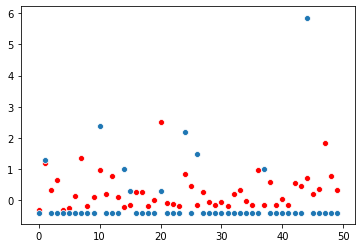

In [98]:
import seaborn as sns
x_temp = [i for i in range(len(y_pred))]
sns.scatterplot(x_temp[:50], y_pred[:50], color='r')
sns.scatterplot(x_temp[:50], y_text[:50])

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
lr.score(X_test, y_text)

0.002953692741486935

In [90]:
y_pred = lr.predict(X_test)

In [ ]:
# 피쳐로 그냥 쓸것인가
# 시청률에 영향을 미치는 피처로 학습시킬것인가
# 시청률 범위 -30 ~ +30

